# Communicate Data Finding
## Ford GoBike Exploration Visualization
### by (Ghadah Barahim)




## Investigation Overview

> The main goal is to explore data and communicate to the different relationship between variables.

## Dataset Overview

> Ford GoBike is the Bay Area's bike share system. it consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. It's a fun, convenient and affordable way to get around.

> The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.
to  see the data [Here](https://www.lyft.com/bikes/bay-wheels/system-data)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
# Define the colors will be using for visualization
color_1 = sb.color_palette()[0]
color_2 = sb.color_palette()[1]

> Load the dataset and describe its properties

In [3]:
# Read The data from three CSV files
csv_file_list = ["202001-baywheels-tripdata.csv", "202002-baywheels-tripdata.csv" ,
                 "202003-baywheels-tripdata.csv"]

dataframes = []
for file in csv_file_list:
    dataframes.append(pd.read_csv(file))

df_o =pd.concat(dataframes)

In [4]:
df_o.shape

(905007, 14)

In [5]:
df_o.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
100267,1372,2020-02-05 13:08:36.4400,2020-02-05 13:31:29.2870,381.0,20th St at Dolores St,37.758238,-122.426094,16.0,Market St at Steuart St,37.794497,-122.394838,12504,Customer,NaN
252098,618,2020-02-28 08:44:44,2020-02-28 08:55:03,NaN,NaN,37.773970,-122.392084,NaN,NaN,37.799754,-122.397663,412584,Subscriber,app


In [6]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  int64  
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         418705 non-null  float64
 4   start_station_name       419938 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           419225 non-null  float64
 8   end_station_name         420499 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  int64  
 12  user_type                905007 non-null  object 
 13  rental_access_method     617858 non-null  object 
dtypes: f

In [7]:
df_o.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,905007.000000,418705.000000,905007.000000,905007.000000,419225.000000,905007.000000,905007.000000,905007.000000
mean,806.783430,175.490438,37.747956,-122.356863,168.499295,37.747504,-122.354743,345257.165427
std,1651.803494,146.361852,0.229245,0.646076,145.618964,0.270214,0.795225,305503.123238
min,60.000000,3.000000,0.000000,-122.514230,3.000000,0.000000,-122.575763,12.000000
25%,370.000000,56.000000,37.765281,-122.420664,44.000000,37.765464,-122.419957,12114.000000
50%,595.000000,123.000000,37.776972,-122.404635,116.000000,37.777062,-122.403681,326439.000000
75%,932.000000,275.000000,37.789914,-122.392741,265.000000,37.790229,-122.392741,557460.000000
max,811077.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


In [8]:
df_o['start_station_name'].value_counts()

Market St at 10th St                              7676
San Francisco Caltrain (Townsend St at 4th St)    7364
Berry St at 4th St                                6560
Howard St at Beale St                             5293
Market St at Steuart St                           4992
                                                  ... 
22nd St at Potrero Ave                              18
Columbia Ave at Bird Ave                            17
MTL-ECO5-01                                          6
16th St Depot                                        1
San Jose Depot                                       1
Name: start_station_name, Length: 453, dtype: int64

In [9]:
df_o['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)        13580
Montgomery St BART Station (Market St at 2nd St)       7869
Market St at 10th St                                   7808
Berry St at 4th St                                     7151
San Francisco Ferry Building (Harry Bridges Plaza)     6663
                                                      ...  
Foothill Blvd at Harrington Ave                          18
Columbia Ave at Bird Ave                                 16
Foothill Blvd at 42nd Ave                                14
Bond St at High St                                       11
MTL-ECO5-01                                               6
Name: end_station_name, Length: 452, dtype: int64

In [10]:
user = df_o['user_type'].value_counts()
user_type = user.index
user

Subscriber    544696
Customer      360311
Name: user_type, dtype: int64

In [11]:
df_o['rental_access_method'].value_counts()

app        570471
clipper     47387
Name: rental_access_method, dtype: int64

In [12]:
df_o['bike_id'].value_counts()

978957    420
997397    416
926032    411
594988    406
892636    397
         ... 
406         1
366820      1
522643      1
755785      1
252621      1
Name: bike_id, Length: 10233, dtype: int64

## Primary Explor and Clean Data

> Copy The DataFrame

In [13]:
df = df_o.copy()

> Convert start_station_id and end_station_id to str

In [14]:
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)

> Convert started_at and ended_at to time type and separate it into data, day and  time columns

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [16]:
df.insert(1 ,'start_year', 'start_year')
df.insert(2 ,'start_month', 'start_month')
df.insert(3 ,'start_day', 'start_day')
df.insert(4 ,'start_times', 'start_times')

df['start_year'] = df['start_time'].dt.year
df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_times'] = df['start_time'].dt.strftime('%H:%M:%S')

In [17]:
df.insert(6 ,'end_year', 'end_year')
df.insert(7 ,'end_month', 'end_month')
df.insert(8 ,'end_day', 'end_day')
df.insert(9 ,'end_times', 'end_times')

df['end_year'] = df['end_time'].dt.year
df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_times'] = df['end_time'].dt.strftime('%H:%M:%S')

In [18]:
# drop start_time and end_time column
df.drop('start_time', axis = 1 , inplace=True)
df.drop('end_time', axis = 1 , inplace=True)

> Convert start_time and end_time into hour

In [19]:
df['start_times'] = pd.to_datetime(df['start_times'], format='%H:%M:%S').dt.hour
df['end_times'] = pd.to_datetime(df['end_times'], format='%H:%M:%S').dt.hour

> Convert user_type and rental_access_method into category

In [20]:
df['user_type'] = df['user_type'].astype('category')
df['rental_access_method'] = df['rental_access_method'].astype('category')

> Check duplicates in rows

In [21]:
df.duplicated().sum()

7513

In [22]:
# drop duplicates rows
df.drop_duplicates(keep=False,inplace=True) 

In [23]:
df.duplicated().sum()

0

> Final Information about The Clean DataFrame

In [24]:
df.shape

(889981, 20)

In [25]:
df.head()

,duration_sec,start_year,start_month,start_day,start_times,end_year,end_month,end_day,end_times,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020,January,Friday,15,2020,February,Saturday,14,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020,January,Friday,15,2020,February,Saturday,10,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020,January,Friday,17,2020,February,Saturday,9,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020,January,Friday,17,2020,February,Saturday,9,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020,January,Friday,17,2020,February,Saturday,8,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889981 entries, 0 to 176798
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             889981 non-null  int64   
 1   start_year               889981 non-null  int64   
 2   start_month              889981 non-null  object  
 3   start_day                889981 non-null  object  
 4   start_times              889981 non-null  int64   
 5   end_year                 889981 non-null  int64   
 6   end_month                889981 non-null  object  
 7   end_day                  889981 non-null  object  
 8   end_times                889981 non-null  int64   
 9   start_station_id         889981 non-null  object  
 10  start_station_name       417644 non-null  object  
 11  start_station_latitude   889981 non-null  float64 
 12  start_station_longitude  889981 non-null  float64 
 13  end_station_id           889981 non-null  ob

In [27]:
df.describe()

,duration_sec,start_year,start_times,end_year,end_times,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id
count,889981.000000,889981.0,889981.000000,889981.0,889981.000000,889981.000000,889981.000000,889981.000000,889981.000000,889981.000000
mean,805.498075,2020.0,13.639010,2020.0,13.805423,37.748122,-122.356561,37.747663,-122.354400,342460.367801
std,1659.537506,0.0,4.767269,0.0,4.793298,0.230586,0.651204,0.271989,0.801663,305624.859122
min,60.000000,2020.0,0.000000,2020.0,0.000000,0.000000,-122.514230,0.000000,-122.575763,12.000000
25%,370.000000,2020.0,9.000000,2020.0,9.000000,37.765383,-122.420618,37.765594,-122.419724,12060.000000
50%,594.000000,2020.0,14.000000,2020.0,15.000000,37.777041,-122.404292,37.777133,-122.403493,322679.000000
75%,930.000000,2020.0,17.000000,2020.0,18.000000,37.789994,-122.392741,37.790322,-122.392741,554362.000000
max,811077.000000,2020.0,23.000000,2020.0,23.000000,37.880222,0.000000,37.995942,0.000000,999960.000000


In [28]:
df.isnull().sum()

duration_sec                    0
start_year                      0
start_month                     0
start_day                       0
start_times                     0
end_year                        0
end_month                       0
end_day                         0
end_times                       0
start_station_id                0
start_station_name         472337
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name           471790
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       287147
dtype: int64

### What is the structure of your dataset?
> This original DataFrame for the 1st quarter of 2020(January, February, March, ), it contains 14 features(columns) and  905007 rows.
After a little of wrangling and cleaning, the DataFrame has 20 features(columns) and 889975 rows.

### What is/are the main feature(s) of interest in your dataset?
> 
The main features of interest in this the dataset are  :

• duration_sec (The taken time each trip)

•start_month, start_day  and start_times  ( The month, day and time that the start of trip take place in it)

• user_type (know if the user are customer or subscriber)

• rental_access_method(know which method are used to access rental)


> I'm interested in knowing whether the user type are with the average duration of the trip, as well as the time, day and month the trip take place in.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> duration_sec (could convert it into duration by minutes),  start_month, start_day  and start_times  , user_type ,rental_access_method , start_station_name and  end_station_name.

In [29]:
data = {'questions': ['What are the most comman rental access method ?', 
                      'What is the most start and end stations?',
                      'When are most trips taken in terms of day , month or month ?',
                      'How long the avrage tripe duration ?',
                      'What is the most user type ?'
                      'Does the above depend on if a user is a subscriber or customer?'] ,
        'features':  ['rental_access_method', 
                      'start_station_name , end_station_name' ,
                      'start_year,start_month, start_day,start_time',
                        'start_times , end_times , duration_sec ' ,
                        ' user_type']}

structure = pd.DataFrame (data, columns = ['features','questions'])
structure

,features,questions
0,rental_access_method,What are the most comman rental access method ?
1,"start_station_name , end_station_name",What is the most start and end stations?
2,"start_year,start_month, start_day,start_time","When are most trips taken in terms of day , mo..."
3,"start_times , end_times , duration_sec",How long the avrage tripe duration ?
4,user_type,What is the most user type ?Does the above dep...


## Univariate Exploration

> In this section, investigate distributions of individual variables. 

#### What are the most comman rental access method?

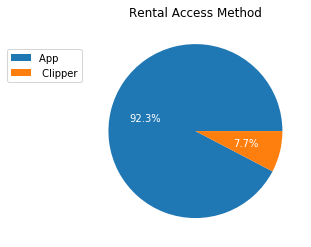

In [30]:
plt.pie(df['rental_access_method'].value_counts() , colors=['tab:blue' ,'tab:orange'] ,
            autopct='%0.1f%%' , textprops=dict(color="w")) ;
plt.legend(labels=['App ',' Clipper'] , bbox_to_anchor=(0, 0.5, 0, 0.4));
plt.title('Rental Access Method') ;

> Here we can see from the pie chart to know the percentage of the rental access method, 92.3% are through the app while  7.7% by the clipper.
but it important to know that rental_access_method columns have 287141 missing values.
>> The next step for the variable is to know if it related to user type.

#### What is the most start and end stations ?


In [31]:
top_start_station =df['start_station_name'].value_counts()[:10]
top_end_station =df['end_station_name'].value_counts()[:10]
#station = top_start_station , top_start_station

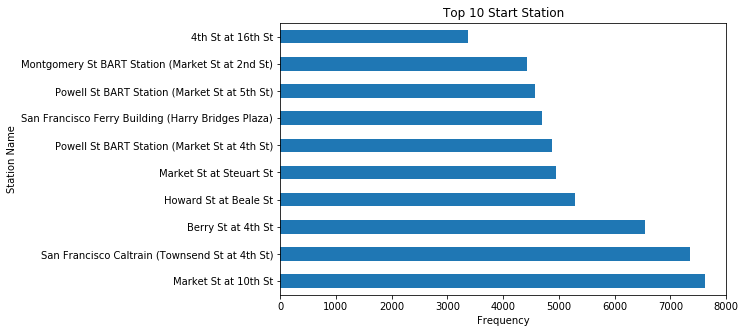

In [32]:
top_start_station.plot(kind='barh' , color =color_1 ,figsize=(8,5) );
plt.title('Top 10 Start Station') ; 
plt.ylabel('Station Name');
plt.xlabel('Frequency') ;

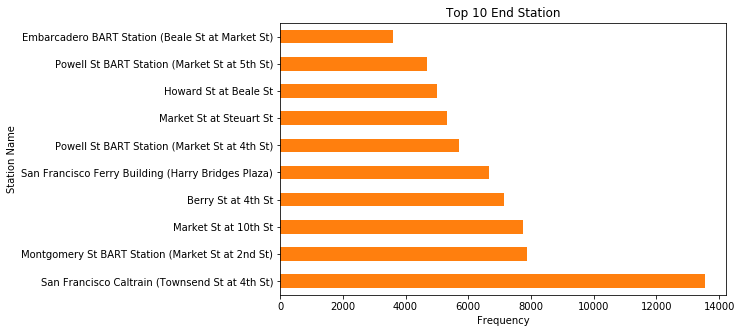

In [33]:
top_end_station.plot(kind='barh' , color =color_2 , figsize=(8,5) );
plt.title('Top 10 End Station') ; 
plt.ylabel("Station Name") ;
plt.xlabel('Frequency') ;

> From the two bar charts(horizontal), we can see the most common 10 stations for the start and end trip.
the first common start station is Market Sat 10th St while the end station is San Francisco Caltrain(Townsend St at 4th St).
>> The next step for the variables is to know if it related to user type

#### When are most trips taken in terms of time ,day and month ?

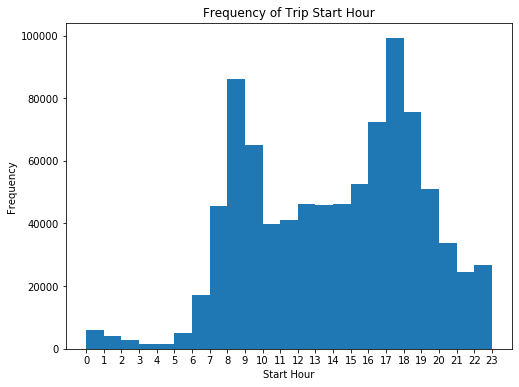

In [34]:
plt.figure(figsize=[8, 6])
bins = np.arange(0, df['start_times'].max()+1, 1)
plt.hist(data = df , x = 'start_times' ,bins=bins , color = color_1 );
plt.xlabel('Start Hour');
plt.ylabel('Frequency') ;
plt.title('Frequency of Trip Start Hour') ;
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]);

In [35]:
day_value=df['start_day'].value_counts()
day_type = day_value.index
month_value=df['start_month'].value_counts()
month_type = month_value.index

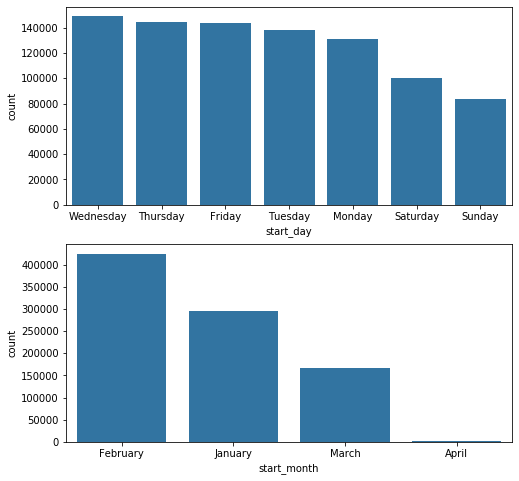

In [36]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8]) ;
sb.countplot(data = df, x = 'start_day', color = color_1, order = day_type ,ax = ax[0]) ;
sb.countplot(data = df, x = 'start_month', color = color_1, order = month_type,  ax = ax[1]) ;


> Time:
the first histogram has 2 peaks, the first peak between 8:00 to 10:00 a.m, the second peak between 17:00 to 20:00 p.m.

> Day:
The order of trips taken by day as shown in the bar chart (Wednesday ,Thursday ,Friday , Tuesday, Monday , Saturday, Sunday ).

> Month:
the order of trips taken by month for the second quarter of 2020 as shown in the bar chart(February , January, March, April).

>> The next step for the variables is to know if it related to user type

#### What is the avarge duration of the trip ?

In [37]:
df['duration_sec'].describe()

count    889981.000000
mean        805.498075
std        1659.537506
min          60.000000
25%         370.000000
50%         594.000000
75%         930.000000
max      811077.000000
Name: duration_sec, dtype: float64

In [38]:
# from df['duration_sec'].describe values above, there is an extreme outlier that affects this variable
# so we will drop this extreme outlier
duration_outlier = df.query("duration_sec == 811077")
duration_outlier.index

Int64Index([121168], dtype='int64')

In [39]:
# drop outlier 
df.drop(121168 , axis = 0 , inplace = True)

In [40]:
df['duration_sec'].describe()

count    889978.000000
mean        804.587515
std        1419.988815
min          60.000000
25%         370.000000
50%         594.000000
75%         930.000000
max       86317.000000
Name: duration_sec, dtype: float64

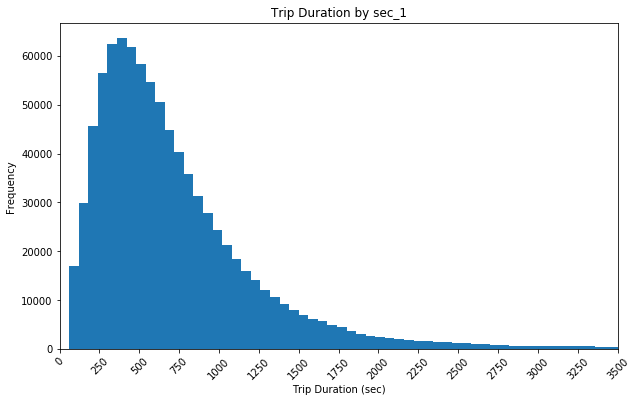

In [41]:
plt.figure(figsize=[10, 6])
bins = np.arange(60, df['duration_sec'].max()+10, 60)
plt.hist(data = df , x = 'duration_sec' , bins=bins , color = color_1 );
plt.xlabel('Trip Duration (sec)');
plt.ylabel('Frequency ');
plt.title('Trip Duration by sec_1')
plt.xlim(0,3500) ;
plt.xticks([0 ,250, 500 ,750, 1000 , 1250,1500 ,1750, 2000 ,2250, 2500 ,
            2750 , 3000 , 3250,3500 ] ,  rotation='45');

> The histogram chart is skewed into the right and we can say that from 250 to 1000 sec is the peak.

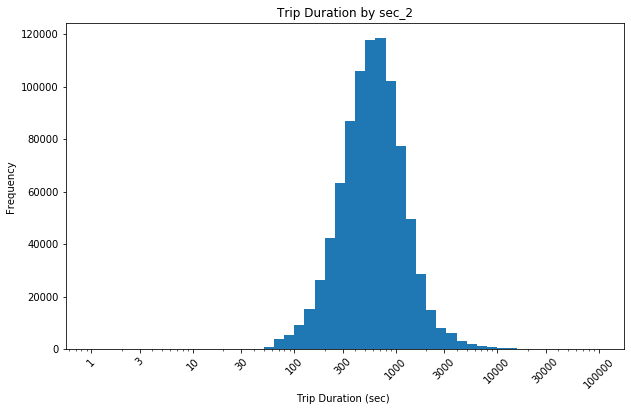

In [42]:
# Trip Duration by second, here I used transformer (log)
plt.figure(figsize=[10, 6])
bins = 10**np.arange (0, np.log10(df['duration_sec'].max())+0.1, 0.1)
ticks =  [1,3,10, 30 , 100 , 300 , 1000 , 3000,10000 , 30000 , 100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_sec' , bins=bins , color = color_1 );
plt.xlabel('Trip Duration (sec) ');
plt.ylabel('Frequency ');
plt.title('Trip Duration by sec_2')
plt.xscale('log');
plt.xticks(ticks,labels , rotation='45');


> This histogram chart is shows a normal distribution , the majority of the trip durations are between 300 to 1000 sec

In [43]:
# To see trip duration by minutes 
## (I think it better to major trip duration by minutes)
# Adding new column into the df
df['duration_min'] = df['duration_sec'] / 60

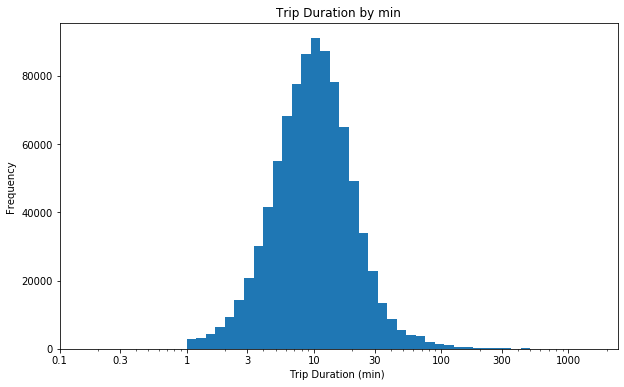

In [44]:
# Trip Duration by minutes , using transformer (log)
plt.figure(figsize=[10, 6])
bins = 10**np.arange (0, np.log10(df['duration_min'].max())+0.075 , 0.075)
ticks =  [0.1 , 0.3 ,1 , 3, 10, 30 , 100 , 300 , 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins=bins , color = color_1 );
plt.xlabel('Trip Duration (min) ');
plt.ylabel('Frequency ');
plt.title('Trip Duration by min')
plt.xscale('log');
plt.xticks(ticks,labels);


> The duration by minutes histogram shows a normal distribution , the majority of the trip durations are around 10 min

#### What is the most user type ?

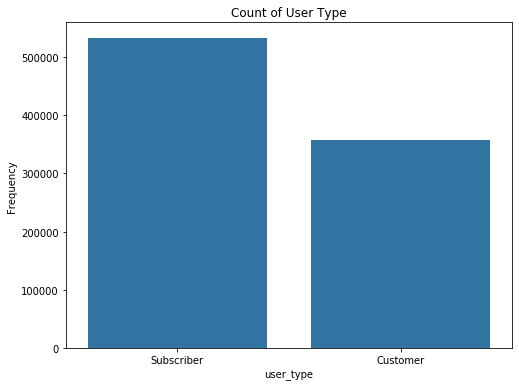

In [45]:
fig = plt.subplots(figsize = [8,6])
sb.countplot(data = df, x ='user_type' , order=user_type , color=color_1);
plt.ylabel('Frequency') ;
plt.title('User Type') ;
plt.title('Count of User Type') ; 

> The bar chart here shows the type of users, the more than 500000 are a subscriber and more 300000 are a customer.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 
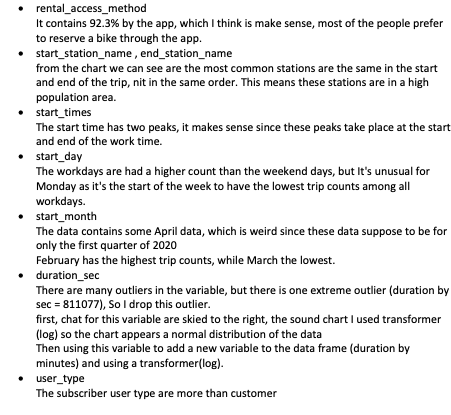

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the data. 

### Relationship of user_type with the Other Variables

#### Relationship between user_type and rental_access_method

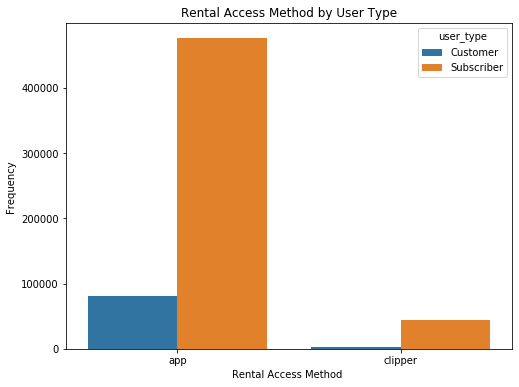

In [46]:
fig = plt.subplots(figsize = [8,6]) ;
sb.countplot(data = df , x = 'rental_access_method' , hue='user_type' ) ;
plt.xlabel('Rental Access Method ');
plt.ylabel('Frequency ');
plt.title('Rental Access Method by User Type') ;

#### Relationship between user_type and (start_day , start_month)

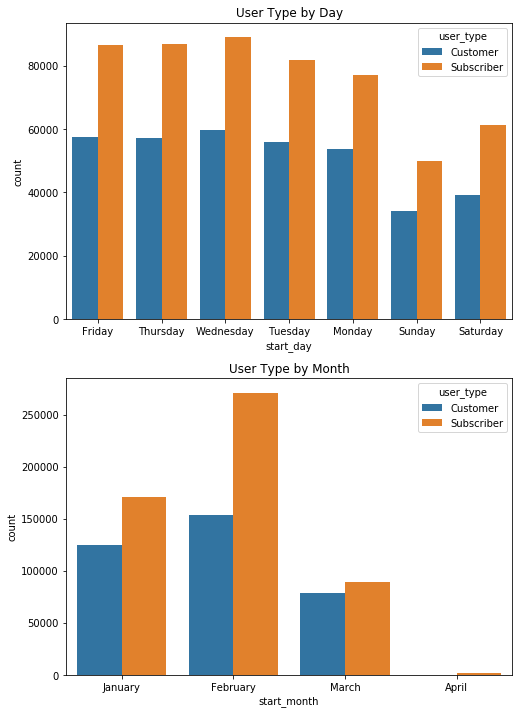

In [47]:
fig, ax = plt.subplots(nrows=2, figsize = [8,12] )
sb.countplot(data = df , x = 'start_day' , hue='user_type'  ,
             ax = ax[0]).set_title('User Type by Day') ;
sb.countplot(data = df , x = 'start_month' , hue='user_type' ,
             ax = ax[1]).set_title('User Type by Month') ;


#### Relationship between user_type and start_times

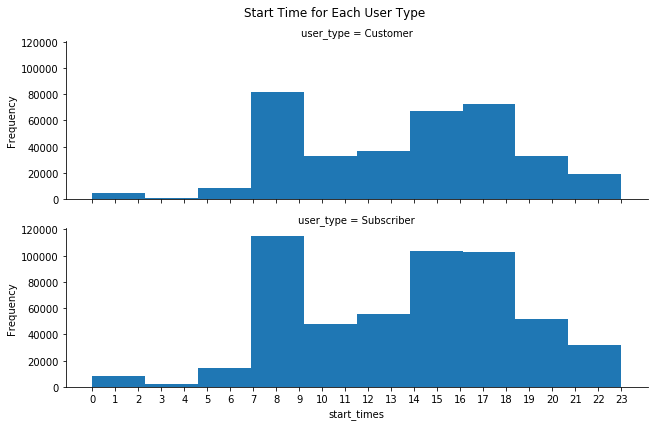

In [48]:
bins = np.arange(0, 23+0.01 , 0.01)
facet = sb.FacetGrid(data=df , col='user_type' , col_wrap = 1 , aspect=3 ,height=3 )
facet.map(plt.hist ,'start_times' ) ;
facet.fig.suptitle('Start Time for Each User Type')
facet.fig.subplots_adjust(top=0.9)
axes = facet.axes.flatten()
axes[0].set_ylabel("Frequency")
axes[1].set_ylabel("Frequency")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]);

#### Relationship between user_type and duration_min

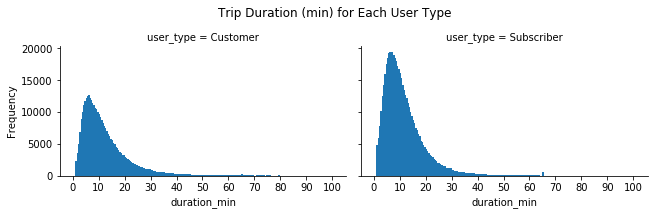

In [49]:
bins = np.arange(0, 100+1 , 0.5)
facet = sb.FacetGrid(data=df , col='user_type' , col_wrap = 2 ,  aspect=1.5 ,height=3)
facet.map(plt.hist ,'duration_min'  , bins=bins) ;
facet.fig.suptitle('Trip Duration (min) for Each User Type')
facet.fig.subplots_adjust(top=0.8)
axes = facet.axes.flatten()
axes[0].set_ylabel("Frequency")
plt.xticks([0,10,20,30,40,50,60,70,80,90,100]);

### Relationship of duration_min with the Other Variables

#### Relationship between duration_min and (start_day , start_month)

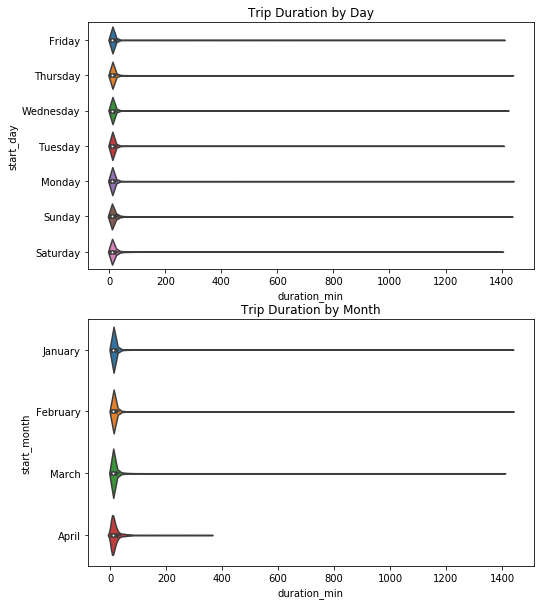

In [50]:
fig, ax = plt.subplots(nrows=2, figsize = [8,10]) ;
sb.violinplot(data=df , x='duration_min' , y='start_day' ,
              ax=ax[0]).set_title('Trip Duration by Day') ;
sb.violinplot(data=df , x='duration_min' , y='start_month' ,
              ax=ax[1]).set_title('Trip Duration by Month');

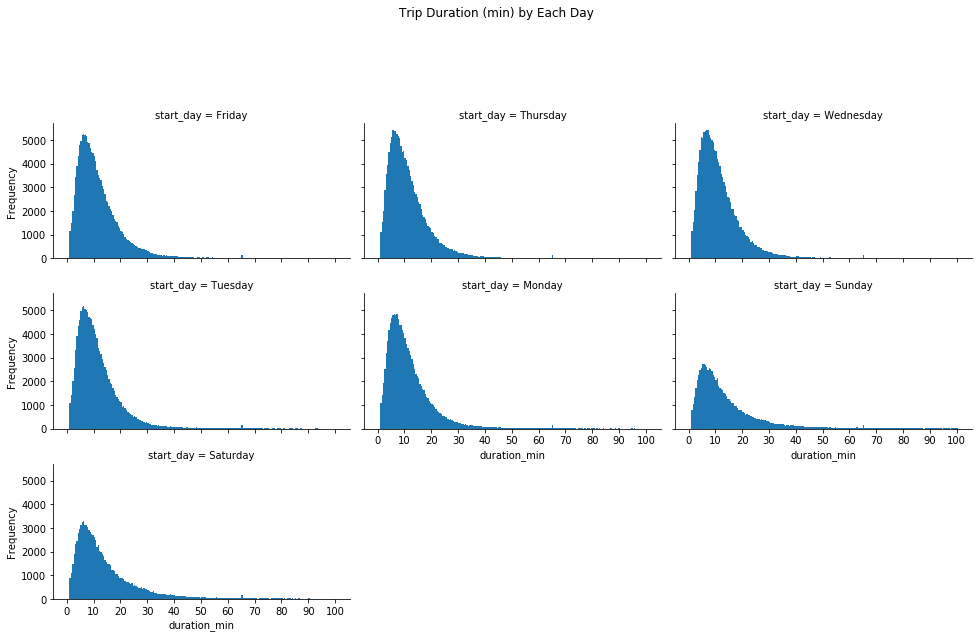

In [51]:
bins = np.arange(0, 100+1 , 0.5)
facet = sb.FacetGrid(data=df , col='start_day' , col_wrap = 3  ,aspect=1.5 ,height=3 )
facet.map(plt.hist ,'duration_min'  , bins=bins) ;
facet.fig.suptitle('Trip Duration (min) by Each Day')
facet.fig.subplots_adjust(top=0.8)
axes = facet.axes.flatten()
axes[0].set_ylabel("Frequency") 
axes[3].set_ylabel("Frequency") 
axes[6].set_ylabel("Frequency") 
plt.xticks([0,10,20,30,40,50,60,70,80,90,100]);

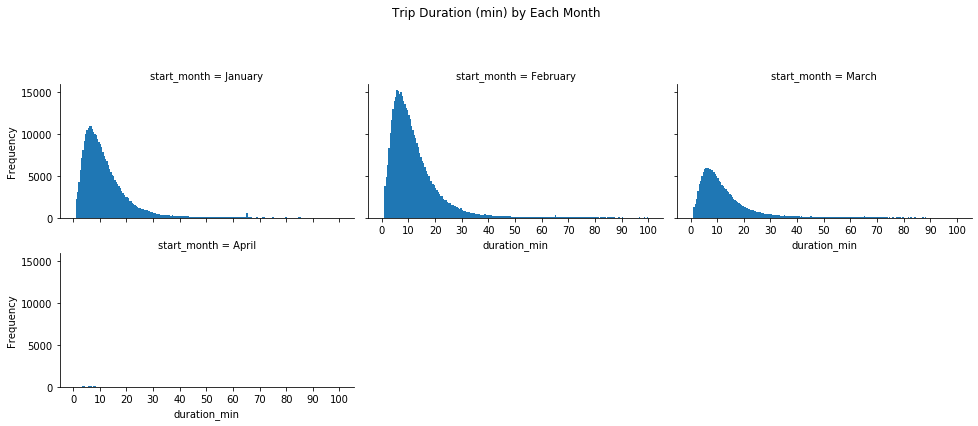

In [52]:
bins = np.arange(0, 100+1 , 0.5)
facet = sb.FacetGrid(data=df , col='start_month' , col_wrap = 3 ,  aspect=1.5 ,height=3 )
facet.map(plt.hist ,'duration_min'  , bins=bins) ;
facet.fig.suptitle('Trip Duration (min) by Each Month')
facet.fig.subplots_adjust(top=0.8)
axes = facet.axes.flatten()
axes[0].set_ylabel("Frequency") 
axes[3].set_ylabel("Frequency")

plt.xticks([0,10,20,30,40,50,60,70,80,90,100]);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>
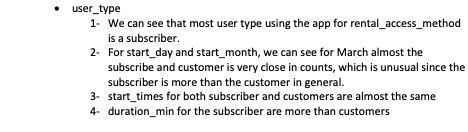



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 
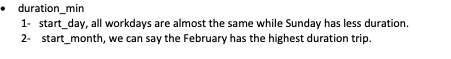

## Multivariate Exploration

> plots of three or more variables to investigate the data even further. 

In [53]:
top_start_station.index[:10]

Index(['Market St at 10th St',
       'San Francisco Caltrain (Townsend St at 4th St)', 'Berry St at 4th St',
       'Howard St at Beale St', 'Market St at Steuart St',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 5th St)',
       'Montgomery St BART Station (Market St at 2nd St)',
       '4th St at 16th St'],
      dtype='object')

In [54]:
top_end_station.index[:10]

Index(['San Francisco Caltrain (Townsend St at 4th St)',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Market St at 10th St', 'Berry St at 4th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 4th St)',
       'Market St at Steuart St', 'Howard St at Beale St',
       'Powell St BART Station (Market St at 5th St)',
       'Embarcadero BART Station (Beale St at Market St)'],
      dtype='object')

In [55]:
df_start = df.loc[df['start_station_name'].isin(['Market St at 10th St',
       'San Francisco Caltrain (Townsend St at 4th St)', 'Berry St at 4th St',
       'Howard St at Beale St', 'Market St at Steuart St',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 5th St)',
       'Montgomery St BART Station (Market St at 2nd St)',
       '4th St at 16th St'])]

In [56]:
df_station = df_start.loc[df_start['end_station_name'].isin(['San Francisco Caltrain (Townsend St at 4th St)',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Market St at 10th St', 'Berry St at 4th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 4th St)',
       'Market St at Steuart St', 'Howard St at Beale St',
       'Powell St BART Station (Market St at 5th St)',
       'Embarcadero BART Station (Beale St at Market St)'])]

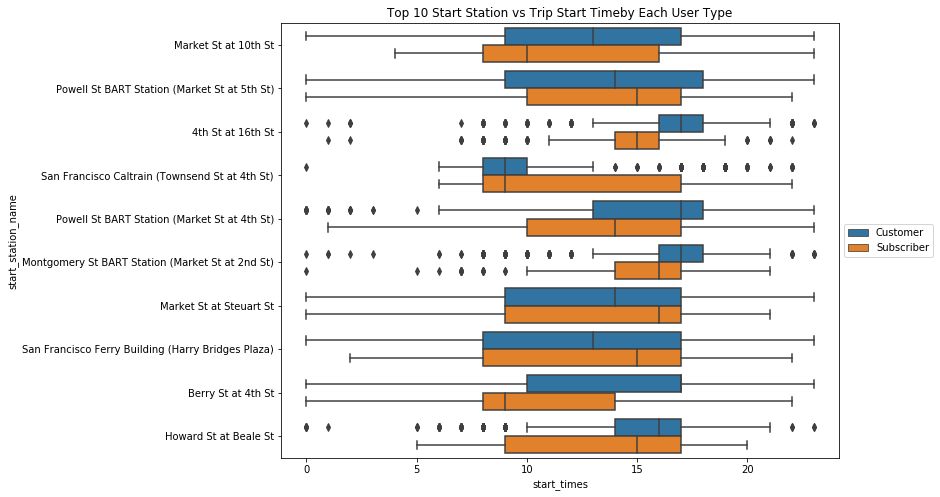

In [57]:
fig = plt.subplots(figsize = [10 , 8]) ;
sb.boxplot(data = df_station, y = 'start_station_name' , x='start_times',
           hue = 'user_type').set_title('Top 10 Start Station vs Trip Start Time'
                                       'by Each User Type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));


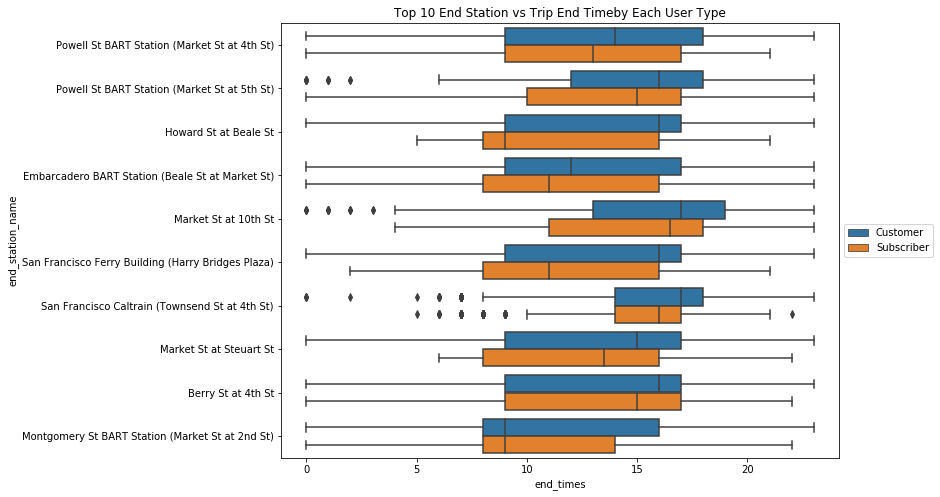

In [58]:
fig = plt.subplots(figsize = [10 , 8]) ;
sb.boxplot(data = df_station, y = 'end_station_name' , x='end_times',
           hue = 'user_type').set_title('Top 10 End Station vs Trip End Time'
                                       'by Each User Type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));


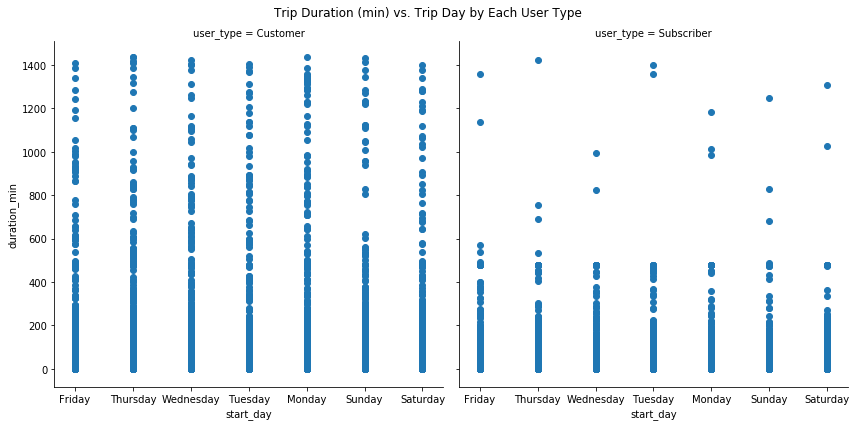

In [59]:
g_2 = sb.FacetGrid(data = df, col = 'user_type', size = 6, col_wrap = 2 )
g_2.map(plt.scatter, 'start_day', 'duration_min' );
g_2.fig.suptitle('Trip Duration (min) vs. Trip Day by Each User Type')
g_2.fig.subplots_adjust(top=0.9)

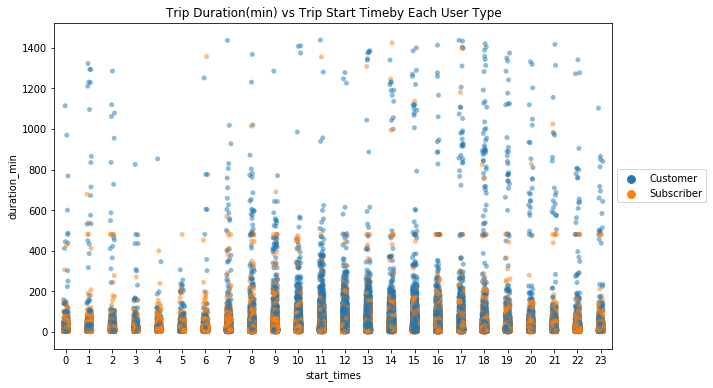

In [60]:
fig = plt.subplots(figsize = [10 , 6]) ;
sb.stripplot(data=df , x='start_times', y='duration_min', hue='user_type' , 
             alpha=1/2,).set_title('Trip Duration(min) vs Trip Start Time'
                                       'by Each User Type') ;
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));


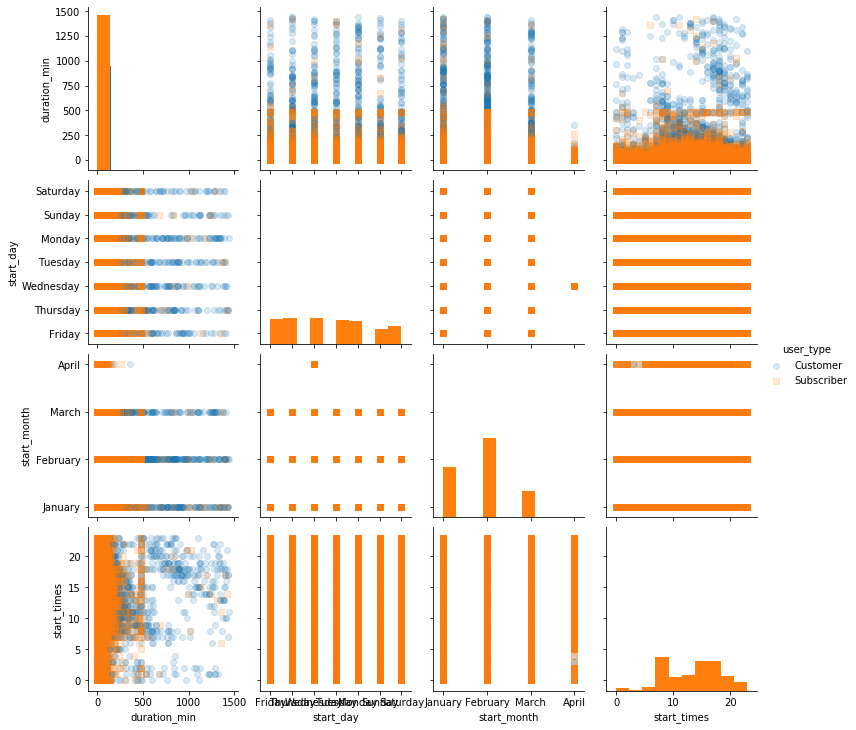

In [61]:
g_1 = sb.PairGrid(data= df , vars=['duration_min' ,'start_day' , 'start_month'  , 'start_times'],
                 hue = 'user_type' ,  hue_kws={"marker": ["o", "s"]})
g_1.map_diag(plt.hist)
g_1.map_offdiag(plt.scatter , alpha = 1/6) ;
g_1= g_1.add_legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 
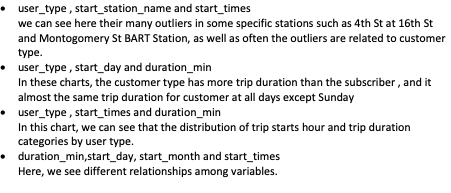


### Were there any interesting or surprising interactions between features?

>
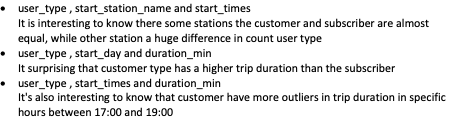